<a href="https://colab.research.google.com/github/DevanshParmar/Facial-Expression-Recognition-with-CNN/blob/main/Facial_Expression_Recognition_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Facial Expression Recognition using CNN**


## Prologue: **Uploading Dataset**







In [ ]:
from google.colab import drive
import zipfile
import os
import time

In [ ]:
drive.mount('/content/gdrive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
!kaggle datasets download -d devanshparmariitk/jaffe-dataset-and-files
%cd /content/gdrive/My Drive/Kaggle

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
 23% 2.00M/8.78M [00:00<00:00, 20.5MB/s]
100% 8.78M/8.78M [00:00<00:00, 56.2MB/s]
/content/gdrive/My Drive/Kaggle


In [ ]:
!ls

 haarcascade_frontalface_default.xml   kaggle.json
'JAFFE Dataset'			       shape_predictor_5_face_landmarks.dat
 jaffe-dataset-and-files.zip


In [ ]:
start = time.time()

with zipfile.ZipFile('/content/jaffe-dataset-and-files.zip', 'r') as zip_ref:
    zip_ref.extractall()
!ls

end = time.time()
print ("Time elapsed during this code block was " + str(int (end - start)) + " seconds")

 haarcascade_frontalface_default.xml   kaggle.json
'JAFFE Dataset'			       shape_predictor_5_face_landmarks.dat
 jaffe-dataset-and-files.zip
Time elapsed during this code block was 4 seconds


## 1 **Data Pre-processing**

### 1.0 **Imports**

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

test_img = 17

### 1.1 **Creating Dataset List**

['/content/gdrive/MyDrive/Kaggle/JAFFE Dataset/all/KA.AN1.39.jpg', '/content/gdrive/MyDrive/Kaggle/JAFFE Dataset/all/KA.AN2.40.jpg', '/content/gdrive/MyDrive/Kaggle/JAFFE Dataset/all/KA.AN3.41.jpg', '/content/gdrive/MyDrive/Kaggle/JAFFE Dataset/all/KA.DI1.42.jpg', '/content/gdrive/MyDrive/Kaggle/JAFFE Dataset/all/KA.DI2.43.jpg', '/content/gdrive/MyDrive/Kaggle/JAFFE Dataset/all/KA.DI3.44.jpg', '/content/gdrive/MyDrive/Kaggle/JAFFE Dataset/all/KA.FE1.45.jpg', '/content/gdrive/MyDrive/Kaggle/JAFFE Dataset/all/KA.FE2.46.jpg', '/content/gdrive/MyDrive/Kaggle/JAFFE Dataset/all/KA.FE3.47.jpg', '/content/gdrive/MyDrive/Kaggle/JAFFE Dataset/all/KA.FE4.48.jpg', '/content/gdrive/MyDrive/Kaggle/JAFFE Dataset/all/KA.HA1.29.jpg', '/content/gdrive/MyDrive/Kaggle/JAFFE Dataset/all/KA.HA2.30.jpg', '/content/gdrive/MyDrive/Kaggle/JAFFE Dataset/all/KA.HA3.31.jpg', '/content/gdrive/MyDrive/Kaggle/JAFFE Dataset/all/KA.HA4.32.jpg', '/content/gdrive/MyDrive/Kaggle/JAFFE Dataset/all/KA.NE1.26.jpg', '/content

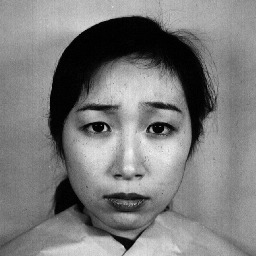

Time elapsed during this code block was 0 seconds


In [ ]:
start = time.time()

path_list = []
matrix_list = []

for file_name in os.listdir('/content/gdrive/MyDrive/Kaggle/JAFFE Dataset/all'):
    file_path = os.path.join('/content/gdrive/MyDrive/Kaggle/JAFFE Dataset/all', file_name)
    if os.path.isfile(file_path):
        path_list.append(file_path)
        image = cv2.imread(file_path)
        matrix_list.append(image)

print(path_list)
cv2_imshow(matrix_list[test_img])
len(matrix_list)

end = time.time()
print ("Time elapsed during this code block was " + str(int (end - start)) + " seconds")

### 1.2 **Cropping**

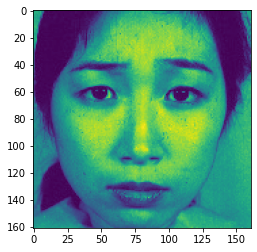

In [ ]:
#gray_list=[]
cropped_img_list=[]

def crop_func(img):
    face_cascade = cv2.CascadeClassifier('/content/gdrive/My Drive/Kaggle/haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #gray_list.append(gray)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5, minSize=(100,100))
    x, y, w, h = faces[0]
    cropped_img = gray[int(y):int(y+h), int(x):int(x+w)]
    cropped_img_list.append(cropped_img)

for img in matrix_list:
    crop_func(img)

plt.imshow(cropped_img_list[test_img])

### 1.3 **Rotation**

In [ ]:
import dlib
!wget http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
!bunzip2 "shape_predictor_5_face_landmarks.dat.bz2"

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_5_face_landmarks.dat')

--2021-07-17 09:33:36--  http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5706710 (5.4M)
Saving to: ‘shape_predictor_5_face_landmarks.dat.bz2’

shape_predictor_5_f 100%[===================>]   5.44M  --.-KB/s    in 0.1s    

2021-07-17 09:33:37 (38.1 MB/s) - ‘shape_predictor_5_face_landmarks.dat.bz2’ saved [5706710/5706710]

bunzip2: Output file shape_predictor_5_face_landmarks.dat already exists.


In [ ]:
import math
import numpy as np
from PIL import Image

"""
def distance(x1, y1, x2, y2):
    d2 = ((x2 - x1)*(x2 - x1)) + ((y2 - y1)*(y2 - y1))
    return math.sqrt(d2)
"""

rotated_img_list = []

def rotate_func(input_img):
    img = input_img.copy()
    rects = detector(img, 0)
    if len(rects) > 0:
        for rect in rects:
            x = rect.left()
            y = rect.top()
            w = rect.right()
            h = rect.bottom()
        landmarks = predictor(img, rect)

        rrx = landmarks.part(0).x     #Right Eye, Right X
        rry = landmarks.part(0).y     #Right Eye, Right Y
        rlx = landmarks.part(1).x     #Right Eye, Left X
        rly = landmarks.part(1).y     #Right Eye, Left Y
        llx = landmarks.part(2).x     #Left Eye, Left X
        lly = landmarks.part(2).y     #Left Eye, Left Y
        lrx = landmarks.part(3).x     #Left Eye, Right X
        lry = landmarks.part(3).y     #Left Eye, Right Y

        rx = (rlx + rrx)//2          #Right Eye, Center X
        ry = (rly + rry)//2          #Right Eye, Center Y
        lx = (llx + lrx)//2          #Left Eye, Center X
        ly = (lly + lry)//2          #Left Eye, Center Y

        #print(lc, rc)

        if ly < ry:
            px = rx
            py = ly
            direction = 1
        else:
            px = lx
            py = ry
            direction = -1
        
        a = (py-ly)*(py-ly) + (px-lx)*(px-lx)  #distance(lx, ly, px, py)       #Horizontal Distance
        b = (ry-ly)*(ry-ly) + (rx-lx)*(rx-lx)  #distance(rx, ry, lx, ly)       #Vertical Distance
        c = (py-ry)*(py-ry) + (px-rx)*(px-rx)  #distance(rx, ry, px, py)       #Total Distance
        cos_a = c/b

        angle = np.arccos(cos_a)
        angle = (angle * 180) / math.pi
        if direction == 1:
            angle = 90 - angle
        angle = direction * angle

        rotated_img = Image.fromarray(img)
        rotated_img = np.array(rotated_img.rotate(angle))
        rotated_img_list.append(rotated_img)

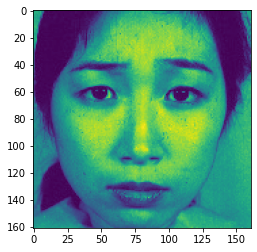

In [ ]:
for img in cropped_img_list:
    rotate_func(img)

plt.imshow(rotated_img_list[test_img])

### 1.4 **Histogram Equalization**

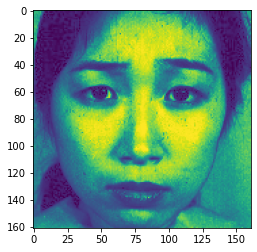

In [ ]:
equalized_img_list = []

def equalize_func(img):
    equalized_img = cv2.equalizeHist(img)
    equalized_img_list.append(equalized_img)

for img in rotated_img_list:
    equalize_func(img)

plt.imshow(equalized_img_list[test_img])

### 1.5 **Data Augmentation**

In [ ]:
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

def random_rotation(image_array: ndarray):
    random_degree = random.uniform(-20, 20)     #Rotating a maximum of 20% on the left and right each
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    return sk.util.random_noise(image_array)    #Addition of random noise

def random_flip(image_array: ndarray):
    return image_array[:, ::-1]                 #Flipping the image array

#### 1.6.1 **Random Rotation**

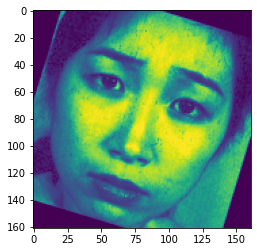

In [ ]:
random_rotation_list = []
for img in equalized_img_list:
    output_img = random_rotation(img)
    random_rotation_list.append(output_img)

plt.imshow(random_rotation_list[test_img])

#### 1.6.2 **Random Noise**

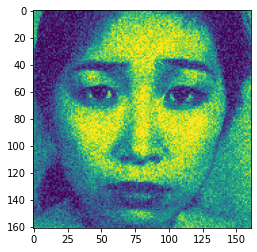

In [ ]:
random_noise_list = []
for img in equalized_img_list:
    output_img = random_noise(img)
    random_noise_list.append(output_img)

plt.imshow(random_noise_list[test_img])

#### 1.6.3 **Random Flip**

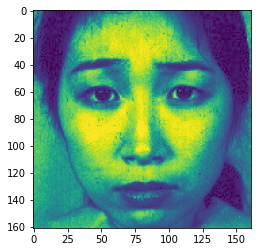

In [ ]:
random_flip_list = []
for img in equalized_img_list:
    output_img = random_flip(img)
    random_flip_list.append(output_img)

plt.imshow(random_flip_list[test_img])

#### 1.6.4 **Assimilation of Augmentation Methods**

219


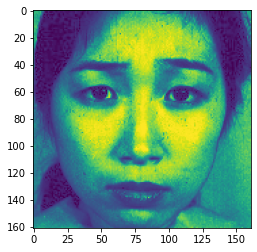

In [ ]:
n_initial = len(equalized_img_list)
final_list = []

for img in equalized_img_list:
    final_list.append(img)
n = len(final_list)
print(n)
plt.imshow(final_list[n + test_img - n_initial])

438


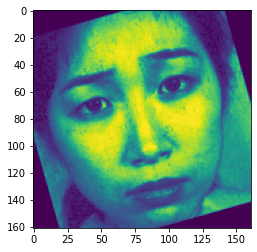

In [ ]:
for img in equalized_img_list:
    img2 = random_rotation(img)
    final_list.append(img2)

n = len(final_list)
print(n)
plt.imshow(final_list[n + test_img - n_initial])

657


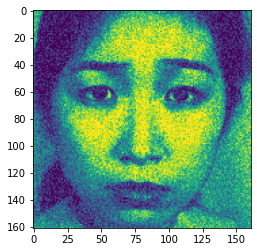

In [ ]:
for img in equalized_img_list:
    img2 = random_noise(img)
    final_list.append(img2)

n = len(final_list)
print(n)
plt.imshow(final_list[n + test_img - n_initial])

876


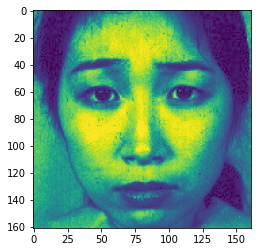

In [ ]:
for img in equalized_img_list:
    img2 = random_flip(img)
    final_list.append(img2)

n = len(final_list)
print(n)
plt.imshow(final_list[n + test_img - n_initial])

### 1.6 **Final Image List**

In [ ]:
image_list = []
for img in final_list:
    image_list.append(img)

In [ ]:
m = 0
label_list = ['anger', 'happy', 'disgust', 'fear', 'sad', 'surprise', 'neutral']

print("Dataset length after augmentation for:")
for expression in label_list:
    i = 0
    folder_name = os.path.join('/content/gdrive/My Drive/Kaggle/JAFFE Dataset/', expression)
    for file_name in os.listdir(folder_name):
        file_path = os.path.join(folder_name, file_name)
        if os.path.isfile(file_path):
            i = i + 1
    n = 4*i
    m += n

    #string = expression + ' expression: ' + str(n)
    print(f"{expression + ' expression: ' + str(n) : >30}")

print(" ")
print("Augmented JAFFE Dataset Size: " + str(m))

Dataset length after augmentation for:
         anger expression: 124
         happy expression: 128
       disgust expression: 120
          fear expression: 128
           sad expression: 136
      surprise expression: 120
       neutral expression: 120
 
Augmented JAFFE Dataset Size: 876


## 2 **Feature Extraction**

### 2.1 **Creating Labels List**


In [ ]:
r = 0
label_list = ['anger', 'happy', 'disgust', 'fear', 'sad', 'surprise', 'neutral']
labels = []

for expression in label_list:
    i = 0
    folder_name = os.path.join('/content/gdrive/My Drive/Kaggle/JAFFE Dataset/', expression)
    for file_name in os.listdir(folder_name):
        file_path = os.path.join(folder_name, file_name)
        if os.path.isfile(file_path):
            i = i + 1
    n = 4*i
    for m in range(0, n):
        labels.append(r)
    r += 1

labels = np.asarray(labels)

### 2.2 **Defining Functions**


In [ ]:
def gpv(img, center, x, y):         #gpv is acronym for "get pixel value"
    value = 0
    try:
        if img[x][y] >= center:
            value = 1
    except:
        pass
    return value

In [ ]:
def lbp_calculated_pixel(img, x, y):                  #lbp is Linear Binary Patterns
    center = img[x][y]
    val_ar = []
    
    val_ar.append(gpv(img, center, x-1, y-1))         #top-left pixel
    val_ar.append(gpv(img, center, x-1, y))           #top pixel
    val_ar.append(gpv(img, center, x-1, y+1))         #top-right pixel
    val_ar.append(gpv(img, center, x, y+1))           #right pixel
    val_ar.append(gpv(img, center, x+1, y+1))         #bottom-right pixel
    val_ar.append(gpv(img, center, x+1, y))           #bottom pixel
    val_ar.append(gpv(img, center, x+1, y-1))         #bottom-left pixel
    val_ar.append(gpv(img, center, x, y-1))           #left pixel
    
    val = 0
    for i in range(0, 8):
        val += val_ar[i] * (2**i)

    return val

### 2.3 **Calculating LBP Score**


In [ ]:
start = time.time()
print ("Expected runtime of this code block is 4 minutes.")

ready_list = []
indicator100 = 0

for img in image_list:
    img_copy = img
    height, width = img_copy.shape
    indicator100 +=1

    if indicator100 % 100 == 0:
        print(str(indicator100) + ' images are processed.')

    #gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    img_lbp = np.zeros((height, width), np.uint8) 

    for i in range(0, height):
        for j in range(0, width):
            img_lbp[i, j] = lbp_calculated_pixel(img_copy, i, j)

    ready_list.append(img_lbp)

print('All images are processed.')

end = time.time()
print ("Time elapsed during this code block was " + str(int ((end - start)//60)) + " minutes.")

Expected runtime of this code block is 4 minutes.
100 images are processed.
200 images are processed.
300 images are processed.
400 images are processed.
500 images are processed.
600 images are processed.
700 images are processed.
800 images are processed.
All images are processed.
Time elapsed during this code block was 3 minutes.


876
[[ 40   0 168 ... 207  23 163]
 [  4 159   5 ... 247 255   0]
 [ 47 223  35 ...   0 132 162]
 ...
 [255   0 223 ...  18 255  66]
 [237   2 255 ...  42   4 130]
 [133 139 141 ...   4 135 131]]


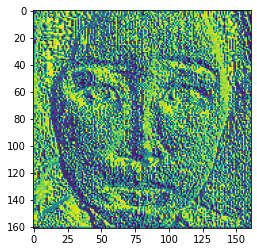

In [ ]:
print(len(ready_list))
print(ready_list[0])

plt.imshow(ready_list[test_img])

Expected runtime of this code block is 13 minutes.
100 images are appended.
200 images are appended.
300 images are appended.
400 images are appended.
500 images are appended.
600 images are appended.
700 images are appended.
800 images are appended.
All images are appended.
Expected runtime would be 11 minutes.


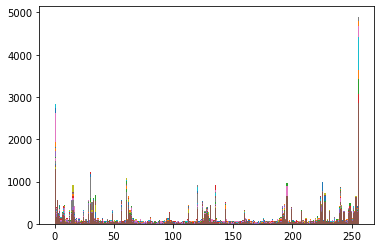

In [ ]:
start = time.time()
print ("Expected runtime of this code block is 13 minutes.")

hist_list = []
indicator100 = 0

for img in ready_list:

    indicator100 += 1
    if indicator100 % 100 == 0:
        print(str(indicator100) + ' images are appended.')

    hist = plt.hist(img.ravel(), 256, [0,256])
    hist_list.append(hist)

print('All images are appended.')

end = time.time()
print ("Expected runtime would be " + str(int ((500 + end - start)//60)) + " minutes.")

### 2.4 **List Alterations**

In [ ]:
for i in range(len(image_list)):
    image_list[i] = np.resize(image_list[i], (128,128))

for i in range(len(ready_list)):
    ready_list[i] = np.resize(ready_list[i], (128,128))

In [ ]:
data_x = np.asarray(ready_list, dtype=np.float32)
print(data_x.shape)

(876, 128, 128)


## 3 **Modeling and Results**

### 3.0 **Imports**

In [ ]:
import tensorflow as tf
import numpy as np

import keras
from keras.initializers import GlorotUniform
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split, KFold

### 3.1 **Defining the CNN Model**

In [ ]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3, kernel_initializer = tf.keras.initializers.GlorotUniform(seed=None)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=(128, 128, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.33),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(7, activation=tf.nn.softmax)
    ])

### 3.2 **Defining K-Fold Validation Variables**

In [ ]:
lrate = 0.0001
n_epochs = 10
splits = 10

In [ ]:
kf = KFold(n_splits = splits, shuffle=True, random_state=None)
kf.get_n_splits(data_x)
print(kf)

KFold(n_splits=10, random_state=None, shuffle=True)


In [ ]:
cnn_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = lrate),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'])

### 3.3 **Running the final model and plotting loss & accuracy**

Epoch 1/10
25/25 [==============================] - 2s 32ms/step - loss: 2.7277 - accuracy: 0.2195 - val_loss: 31.7430 - val_accuracy: 0.1364
Epoch 2/10
25/25 [==============================] - 1s 24ms/step - loss: 1.5663 - accuracy: 0.5063 - val_loss: 21.7185 - val_accuracy: 0.1364
Epoch 3/10
25/25 [==============================] - 1s 24ms/step - loss: 0.9959 - accuracy: 0.6561 - val_loss: 12.5534 - val_accuracy: 0.1364
Epoch 4/10
25/25 [==============================] - 1s 23ms/step - loss: 0.6988 - accuracy: 0.7513 - val_loss: 8.8441 - val_accuracy: 0.1591
Epoch 5/10
25/25 [==============================] - 1s 25ms/step - loss: 0.5035 - accuracy: 0.8084 - val_loss: 6.3777 - val_accuracy: 0.1932
Epoch 6/10
25/25 [==============================] - 1s 24ms/step - loss: 0.3614 - accuracy: 0.8744 - val_loss: 4.9166 - val_accuracy: 0.2614
Epoch 7/10
25/25 [==============================] - 1s 24ms/step - loss: 0.3053 - accuracy: 0.8934 - val_loss: 4.7854 - val_accuracy: 0.2045
Epoch 8/10

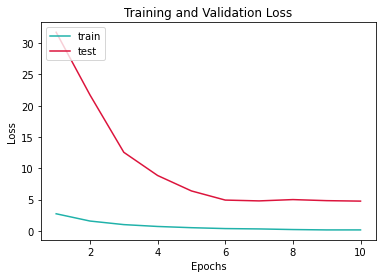

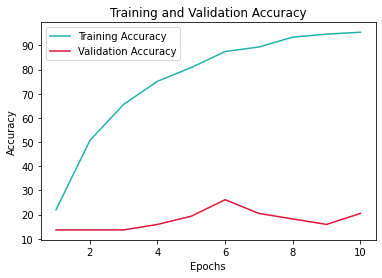

 
The model has run through 1/10 iteration of the K-fold validation method.
 
____________________________________________________________________________________________________________________
********************************************************************************************************************
 
Epoch 1/10
25/25 [==============================] - 1s 27ms/step - loss: 0.3282 - accuracy: 0.9137 - val_loss: 1.9061 - val_accuracy: 0.4545
Epoch 2/10
25/25 [==============================] - 1s 24ms/step - loss: 0.2412 - accuracy: 0.9162 - val_loss: 1.9690 - val_accuracy: 0.4091
Epoch 3/10
25/25 [==============================] - 1s 24ms/step - loss: 0.1647 - accuracy: 0.9467 - val_loss: 2.4150 - val_accuracy: 0.3864
Epoch 4/10
25/25 [==============================] - 1s 24ms/step - loss: 0.1085 - accuracy: 0.9746 - val_loss: 2.1637 - val_accuracy: 0.4091
Epoch 5/10
25/25 [==============================] - 1s 24ms/step - loss: 0.0884 - accuracy: 0.9759 - val_loss: 1.7145 - va

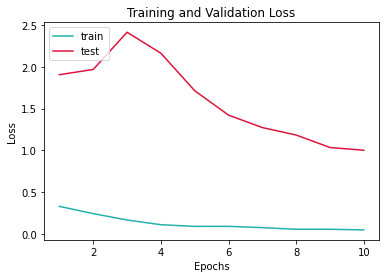

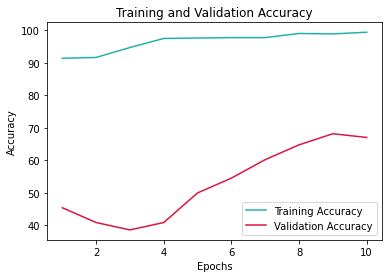

 
The model has run through 2/10 iterations of the K-fold validation method.
 
____________________________________________________________________________________________________________________
********************************************************************************************************************
 
Epoch 1/10
25/25 [==============================] - 1s 25ms/step - loss: 0.0564 - accuracy: 0.9860 - val_loss: 0.7560 - val_accuracy: 0.6932
Epoch 2/10
25/25 [==============================] - 1s 24ms/step - loss: 0.0626 - accuracy: 0.9848 - val_loss: 0.7705 - val_accuracy: 0.6932
Epoch 3/10
25/25 [==============================] - 1s 24ms/step - loss: 0.0413 - accuracy: 0.9924 - val_loss: 0.9902 - val_accuracy: 0.6364
Epoch 4/10
25/25 [==============================] - 1s 24ms/step - loss: 0.0361 - accuracy: 0.9898 - val_loss: 0.9635 - val_accuracy: 0.6364
Epoch 5/10
25/25 [==============================] - 1s 24ms/step - loss: 0.0272 - accuracy: 0.9949 - val_loss: 0.8986 - v

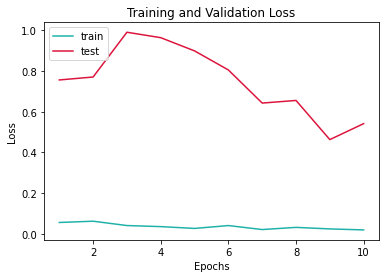

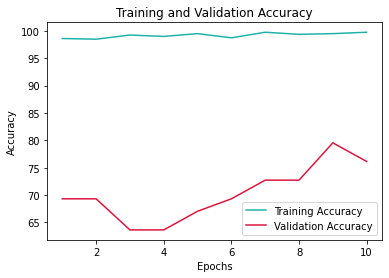

 
The model has run through 3/10 iterations of the K-fold validation method.
 
____________________________________________________________________________________________________________________
********************************************************************************************************************
 
Epoch 1/10
25/25 [==============================] - 1s 28ms/step - loss: 0.0236 - accuracy: 0.9949 - val_loss: 0.3104 - val_accuracy: 0.8295
Epoch 2/10
25/25 [==============================] - 1s 24ms/step - loss: 0.0208 - accuracy: 0.9962 - val_loss: 0.3158 - val_accuracy: 0.8523
Epoch 3/10
25/25 [==============================] - 1s 24ms/step - loss: 0.0179 - accuracy: 0.9962 - val_loss: 0.3565 - val_accuracy: 0.8068
Epoch 4/10
25/25 [==============================] - 1s 24ms/step - loss: 0.0207 - accuracy: 0.9975 - val_loss: 0.5235 - val_accuracy: 0.7614
Epoch 5/10
25/25 [==============================] - 1s 24ms/step - loss: 0.0213 - accuracy: 0.9937 - val_loss: 0.3832 - v

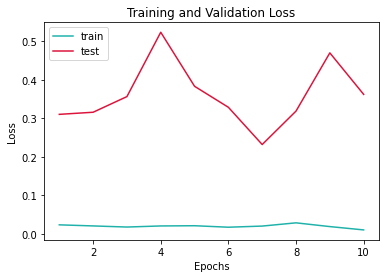

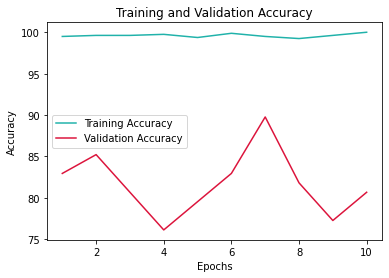

 
The model has run through 4/10 iterations of the K-fold validation method.
 
____________________________________________________________________________________________________________________
********************************************************************************************************************
 
Epoch 1/10
25/25 [==============================] - 1s 25ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.2080 - val_accuracy: 0.9205
Epoch 2/10
25/25 [==============================] - 1s 24ms/step - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.1891 - val_accuracy: 0.9205
Epoch 3/10
25/25 [==============================] - 1s 24ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.2035 - val_accuracy: 0.9205
Epoch 4/10
25/25 [==============================] - 1s 25ms/step - loss: 0.0148 - accuracy: 0.9975 - val_loss: 0.1974 - val_accuracy: 0.9205
Epoch 5/10
25/25 [==============================] - 1s 24ms/step - loss: 0.0102 - accuracy: 0.9987 - val_loss: 0.2568 - v

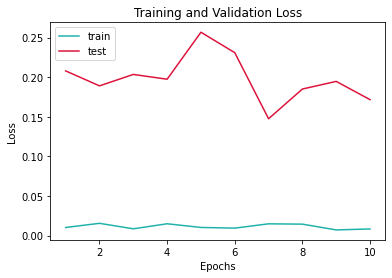

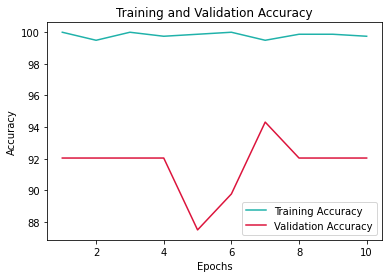

 
The model has run through 5/10 iterations of the K-fold validation method.
 
____________________________________________________________________________________________________________________
********************************************************************************************************************
 
Epoch 1/10
25/25 [==============================] - 1s 25ms/step - loss: 0.0085 - accuracy: 0.9987 - val_loss: 0.3268 - val_accuracy: 0.8409
Epoch 2/10
25/25 [==============================] - 1s 24ms/step - loss: 0.0093 - accuracy: 0.9987 - val_loss: 0.2944 - val_accuracy: 0.8636
Epoch 3/10
25/25 [==============================] - 1s 25ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.2934 - val_accuracy: 0.8636
Epoch 4/10
25/25 [==============================] - 1s 24ms/step - loss: 0.0059 - accuracy: 0.9987 - val_loss: 0.3342 - val_accuracy: 0.8295
Epoch 5/10
25/25 [==============================] - 1s 24ms/step - loss: 0.0067 - accuracy: 0.9987 - val_loss: 0.3926 - v

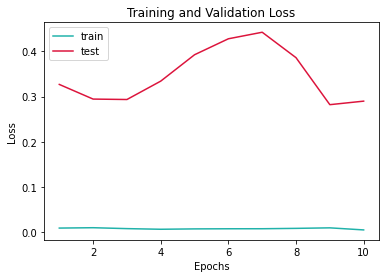

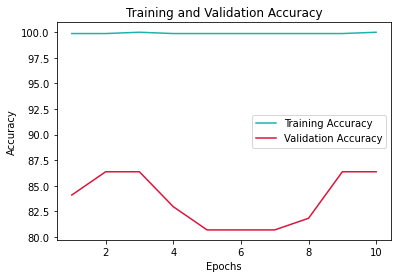

 
The model has run through 6/10 iterations of the K-fold validation method.
 
____________________________________________________________________________________________________________________
********************************************************************************************************************
 
Epoch 1/10
25/25 [==============================] - 1s 28ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.2211 - val_accuracy: 0.9080
Epoch 2/10
25/25 [==============================] - 1s 25ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.2385 - val_accuracy: 0.9080
Epoch 3/10
25/25 [==============================] - 1s 24ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.2463 - val_accuracy: 0.8851
Epoch 4/10
25/25 [==============================] - 1s 25ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.2606 - val_accuracy: 0.8621
Epoch 5/10
25/25 [==============================] - 1s 26ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.2845 - v

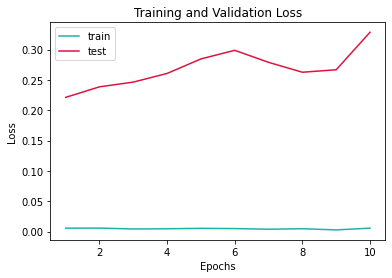

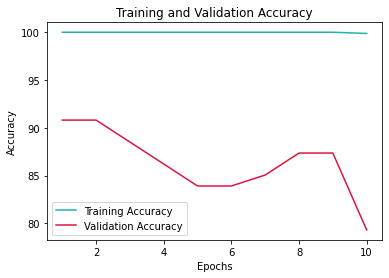

 
The model has run through 7/10 iterations of the K-fold validation method.
 
____________________________________________________________________________________________________________________
********************************************************************************************************************
 
Epoch 1/10
25/25 [==============================] - 1s 26ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.2356 - val_accuracy: 0.8736
Epoch 2/10
25/25 [==============================] - 1s 25ms/step - loss: 0.0067 - accuracy: 0.9975 - val_loss: 0.3128 - val_accuracy: 0.8506
Epoch 3/10
25/25 [==============================] - 1s 24ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.3454 - val_accuracy: 0.8276
Epoch 4/10
25/25 [==============================] - 1s 24ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.2463 - val_accuracy: 0.8966
Epoch 5/10
25/25 [==============================] - 1s 25ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.2338 - v

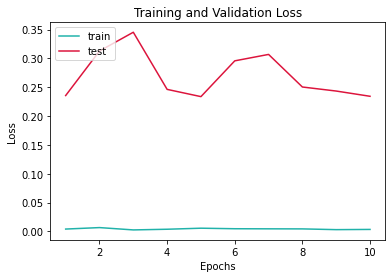

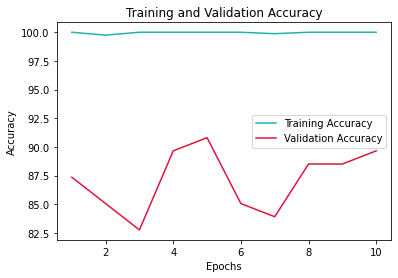

 
The model has run through 8/10 iterations of the K-fold validation method.
 
____________________________________________________________________________________________________________________
********************************************************************************************************************
 
Epoch 1/10
25/25 [==============================] - 1s 28ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.1673 - val_accuracy: 0.9195
Epoch 2/10
25/25 [==============================] - 1s 24ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0992 - val_accuracy: 0.9770
Epoch 3/10
25/25 [==============================] - 1s 24ms/step - loss: 0.0054 - accuracy: 0.9975 - val_loss: 0.1323 - val_accuracy: 0.9540
Epoch 4/10
25/25 [==============================] - 1s 25ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.1678 - val_accuracy: 0.9425
Epoch 5/10
25/25 [==============================] - 1s 25ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.2071 - v

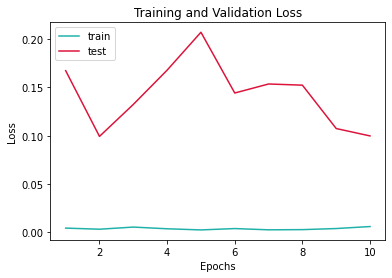

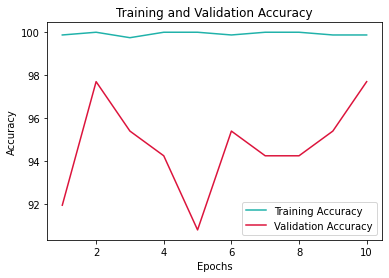

 
The model has run through 9/10 iterations of the K-fold validation method.
 
____________________________________________________________________________________________________________________
********************************************************************************************************************
 
Epoch 1/10
25/25 [==============================] - 1s 26ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0447 - val_accuracy: 1.0000
Epoch 2/10
25/25 [==============================] - 1s 24ms/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.0326 - val_accuracy: 1.0000
Epoch 3/10
25/25 [==============================] - 1s 25ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0333 - val_accuracy: 1.0000
Epoch 4/10
25/25 [==============================] - 1s 24ms/step - loss: 0.0049 - accuracy: 0.9987 - val_loss: 0.0253 - val_accuracy: 1.0000
Epoch 5/10
25/25 [==============================] - 1s 24ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0359 - v

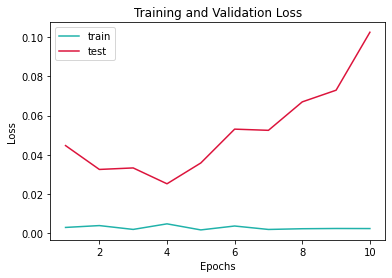

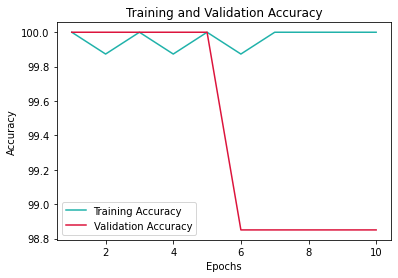

 
The model has run through all iterations of the K-fold validation method.
 


In [ ]:
i = 0
for train_index, test_index in kf.split(data_x, labels):
    X_train, X_test = data_x[train_index], data_x[test_index]
    Y_train, Y_test = labels[train_index], labels[test_index]
    X_train = X_train.reshape(X_train.shape[0], 128, 128, 1)
    X_test = X_test.reshape(X_test.shape[0], 128, 128, 1)
    Y_train = Y_train.reshape(Y_train.shape[0], 1)
    Y_test = Y_test.reshape(Y_test.shape[0], 1)

    i += 1
    cnnm = cnn_model.fit(X_train, Y_train, epochs=n_epochs, validation_data=(X_test, Y_test))
    
    # Performance Measures and Plots: --------------

    loss_train = cnnm.history['loss']
    loss_valid = cnnm.history['val_loss']
    accu_train = [100*i for i in cnnm.history['accuracy']]
    accu_valid = [100*i for i in cnnm.history['val_accuracy']]

    print(' ')
    print('      Minimum Training Loss during this iteration was {:.4f}'.format(min(loss_train)))
    print('    Minimum Validation Loss during this iteration was {:.4f}'.format(min(loss_valid)))
    print(' ')
    print('  Maximum Training Accuracy during this iteration was {:.2f}%'.format(max(accu_train)))
    print('Maximum Validation Accuracy during this iteration was {:.2f}%'.format(max(accu_valid)))
    print(' ')

    epochs = range(1, 1+n_epochs)

    plt.plot(epochs, loss_train, color='lightseagreen', label='Training Loss')
    plt.plot(epochs, loss_valid, color='crimson', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    print(" ")

    plt.plot(epochs, accu_train, color='lightseagreen', label='Training Accuracy')
    plt.plot(epochs, accu_valid, color='crimson', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    print(" ")

    if i == 1:
        print("The model has run through 1/" + str(splits) + " iteration of the K-fold validation method.")
    elif i != splits:
        print("The model has run through " + str(i) +"/" + str(splits) + " iterations of the K-fold validation method.")
    else:
        print("The model has run through all iterations of the K-fold validation method.")
    print(" ")
    if i != splits:
        print("____________________________________________________________________________________________________________________")
        print("********************************************************************************************************************")
        print(" ")

In [ ]:
print('  Maximum Training Accuracy is {:.2f}%'.format(max(accu_train)))
print('Maximum Validation Accuracy is {:.2f}%'.format(max(accu_valid)))

  Maximum Training Accuracy is 100.00%
Maximum Validation Accuracy is 100.00%
